In [1]:
import numpy as np
import missingno as mn
import pandas as pd

In [2]:
data = pd.read_csv('./RefinedData/Training_dataset_Original.csv', low_memory=False)

In [3]:
data.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,...,0,115.019,missing,0,1,0.92665,na,na,L,0


In [4]:
data = data.replace("nan", np.nan)
data = data.replace("missing", np.nan)
data = data.replace("na", np.nan)

In [5]:
def draw_missing_data_row(data):
    total = data.isnull().sum(axis=1).sort_values(ascending=False)
    percent = (data.isnull().sum(axis=1)/data.isnull().count(axis=1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [6]:
missing = draw_missing_data_row(data)

In [7]:
print(missing)

       Total   Percent
55898     44  0.897959
64494     44  0.897959
15012     44  0.897959
29650     44  0.897959
33153     44  0.897959
24193     44  0.897959
72607     44  0.897959
36412     44  0.897959
20180     44  0.897959
10989     44  0.897959
50198     44  0.897959
66523     44  0.897959
33498     44  0.897959
23840     44  0.897959
24085     44  0.897959
77315     44  0.897959
77274     44  0.897959
17757     44  0.897959
10184     44  0.897959
33438     44  0.897959
71633     44  0.897959
51591     44  0.897959
6391      44  0.897959
39378     44  0.897959
68635     44  0.897959
40876     44  0.897959
36486     44  0.897959
49110     44  0.897959
30355     44  0.897959
48707     44  0.897959
...      ...       ...
30685      0  0.000000
62789      0  0.000000
13583      0  0.000000
16827      0  0.000000
45188      0  0.000000
59920      0  0.000000
77370      0  0.000000
78327      0  0.000000
67138      0  0.000000
2625       0  0.000000
70858      0  0.000000
11364      

In [8]:
missing.values[17017] #Found 17017 by hit and trial to find an entry above which more than 25% data is missing

array([12.        ,  0.24489796])

In [9]:
delrows = list((missing.index)[:17017])
data = data.drop(delrows)
data.shape

(62983, 49)

In [10]:
draw_missing_data_row(data)

,Total,Percent
31223,12,0.244898
58019,12,0.244898
60984,12,0.244898
42167,12,0.244898
8577,12,0.244898
40428,12,0.244898
37610,12,0.244898
43824,12,0.244898
61002,12,0.244898
12821,12,0.244898


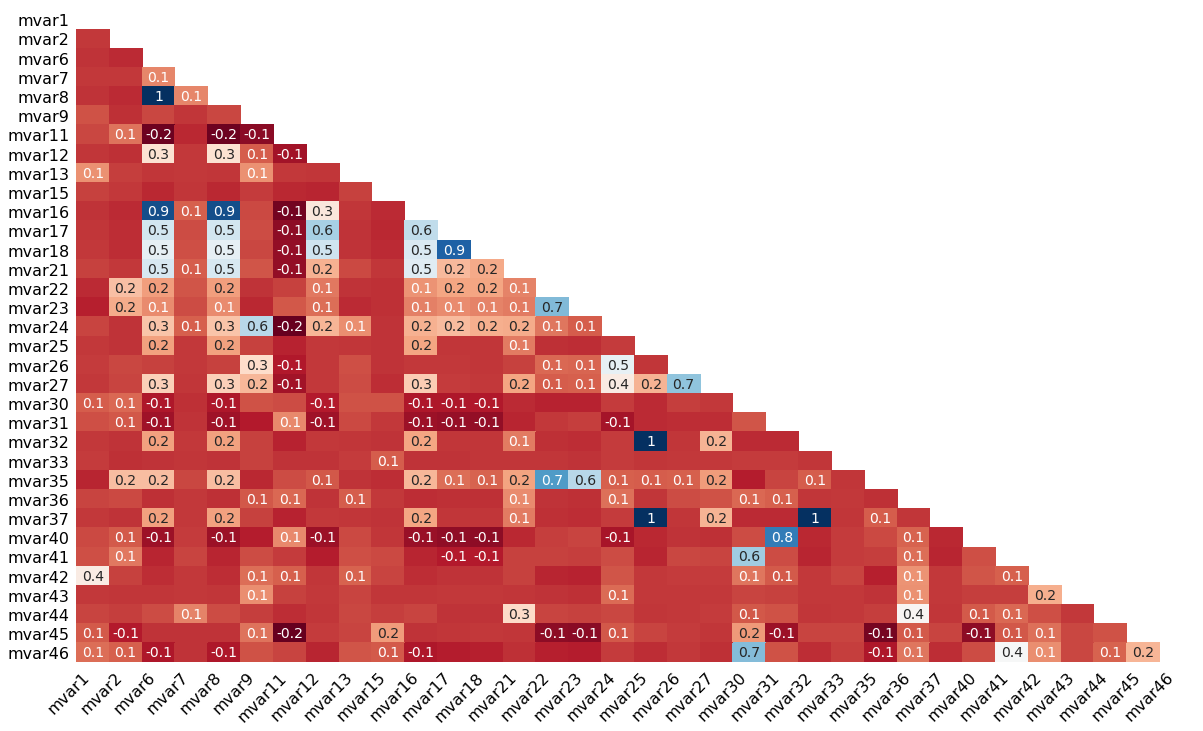

In [11]:
mn.heatmap(data)

In [12]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [13]:
draw_missing_data_table(data)

,Total,Percent
mvar40,49145,0.780290
mvar31,44573,0.707699
mvar11,40859,0.648731
mvar41,40202,0.638299
mvar45,31042,0.492863
mvar30,25513,0.405078
mvar23,23882,0.379182
mvar15,23377,0.371164
mvar35,17499,0.277837
mvar46,14620,0.232126


In [14]:
def RemoveCols(data):
    data.drop('mvar40', axis=1, inplace=True)
    data.drop('mvar31', axis=1, inplace=True)
    data.drop('mvar41', axis=1, inplace=True)
    data.drop('mvar11', axis=1, inplace=True)
    data.drop('mvar23', axis=1, inplace=True)
    data.drop('mvar45', axis=1, inplace=True)
    data.drop('mvar30', axis=1, inplace=True)
    data.drop('mvar35', axis=1, inplace=True)
    data.drop('mvar15', axis=1, inplace=True)
    data.drop('mvar22', axis=1, inplace=True)
    return data

In [15]:
def process(data):
#     mn.dendrogram(data)
#     mn.heatmap(data)
#     mn.bar(data)
#     mn.matrix(data)
    # data.mean(skipna = True)
    # data['mvar1'].mean(skipna = True)
    # data.median()
    data['mvar47'] = data['mvar47'] == 'C'
#     data['mvar47'].head()
    data = RemoveCols(data)
    
    data = data.astype(dtype='float64')
    data = data.fillna(data.median())
    return data

In [16]:
print(data)
data = process(data)

       application_key mvar1   mvar2   mvar3  mvar4  mvar5  mvar6   mvar7  \
0               230032  1696  1.6541   0.000  0.000  0.000      0    6015   
1               230033  1846  0.8095   0.000  0.000  0.000    102    7532   
3               230035  1739  0.2193   0.000  0.000  0.000   1982   26440   
4               230036  1787  0.0118   0.225  0.000  0.000   5451    5494   
8               230040  1836  0.1358   0.000  0.000  0.000    347   38964   
9               230041  1839  0.1981   0.000  0.000  0.000    793    6131   
10              230042  1903  0.0000   0.000  0.000  0.000     22   19518   
11              230043  1681  1.5888   5.685  3.566  0.000     93    3554   
12              230044  1841  0.5388   0.000  0.000  0.000   1487   19449   
13              230045  1794  1.9684   0.000  0.000  0.000    856    8609   
16              230048  1899  0.0970   0.000  0.000  0.000   1015   13379   
17              230049  1690  8.7747  10.437  0.000  0.000    122     623   

In [17]:
print(data.head())

   application_key   mvar1   mvar2  mvar3  mvar4  mvar5   mvar6    mvar7  \
0         230032.0  1696.0  1.6541  0.000    0.0    0.0     0.0   6015.0   
1         230033.0  1846.0  0.8095  0.000    0.0    0.0   102.0   7532.0   
3         230035.0  1739.0  0.2193  0.000    0.0    0.0  1982.0  26440.0   
4         230036.0  1787.0  0.0118  0.225    0.0    0.0  5451.0   5494.0   
8         230040.0  1836.0  0.1358  0.000    0.0    0.0   347.0  38964.0   

     mvar8    mvar9     ...       mvar36  mvar37  mvar38  mvar39   mvar42  \
0    322.0  40369.0     ...          8.0    10.0     4.0     1.0  0.08696   
1   3171.0  18234.0     ...          8.0     0.0     2.0     0.0  0.00000   
3   4955.0  20316.0     ...          3.0     3.0     2.0     0.0  0.15385   
4   5494.0   7987.0     ...          2.0     3.0     2.0     0.0  0.00000   
8  17828.0  70729.0     ...          6.0    12.0     2.0     0.0  0.00000   

   mvar43   mvar44  mvar46  mvar47  default_ind  
0    10.0  0.63899     0.0    

In [18]:
data.to_csv('./RefinedData/refined_training_data.csv', index = False)